<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/4thWeekTask/Visualiasi_StudentsPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#membaca dataset dari google drive
df = pd.read_csv('/content/drive/MyDrive/ML Dataset/StudentsPerformance.csv')

Insight:


informasi parental level of education
*  Bachelor's degree: orang tua siswa telah menyelesaikan pendidikan sarjana (S1)
*  Master's degree: orang tua siswa telah menyelesaikan pendidikan pascasarjana (S2)
*  Associate's degree: gelar akademik yang biasanya didapat setelah dua tahun kuliah, biasanya diperguruan tinggi komunitas
*  Some college: orang tua telah berkuliah di universitas tetapi tidak sampai lulus
*  High school: orang tua siswa hanya menyelesaikan pendidikan tingka SMA
*  Some high school: orang tua siswa hanya bersekolah di SMA, tetapi tidak menyelesaikannya


Informasi kolom lunch

*  Standard: siswa membayar untuk makanan siang dengan harga penuh, yang biasanya menunjukkan kondisi ekonomi keluarga yang baik
*  Free/reduced: siswa menerima makanan siang gratis atau dengan potongan harga, yang biasanya diberikan kepada keluarga dengan penghasilan rendah atau siswa yang memenuhi syarat program subsidi


In [29]:
#menampilkan data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
#menampilkan informasi dari data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [31]:
#melihat unique values dari masing-masing kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'gender':
['female' 'male']

Unique values in column 'race/ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E']

Unique values in column 'parental level of education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values in column 'lunch':
['standard' 'free/reduced']

Unique values in column 'test preparation course':
['none' 'completed']



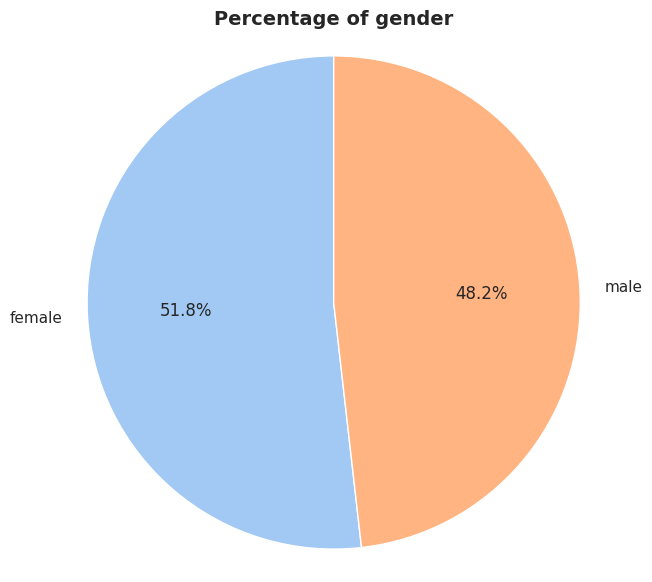

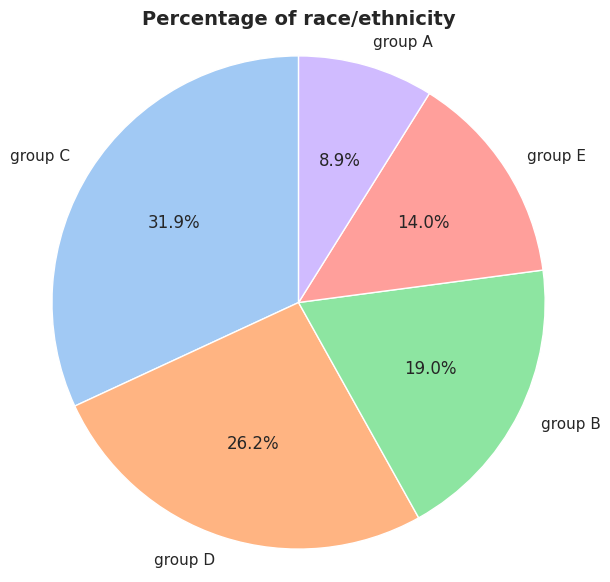

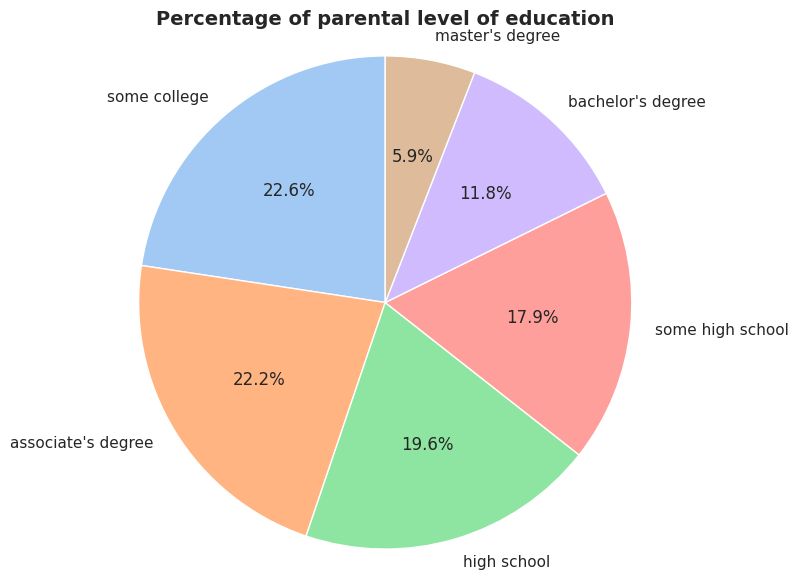

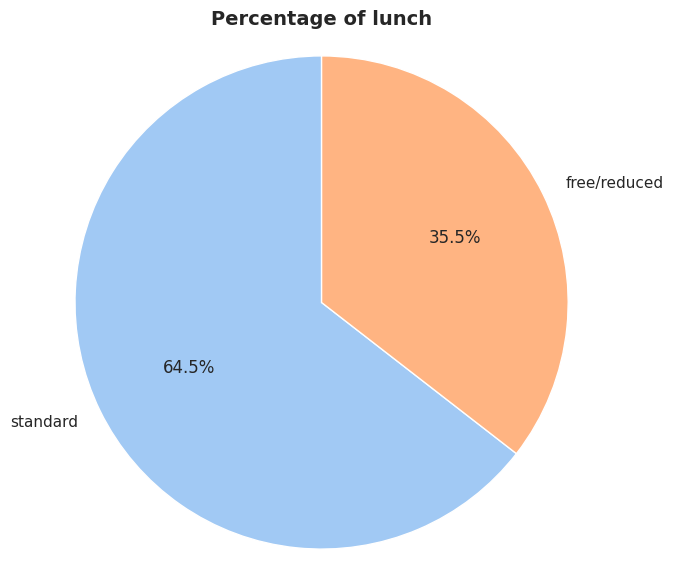

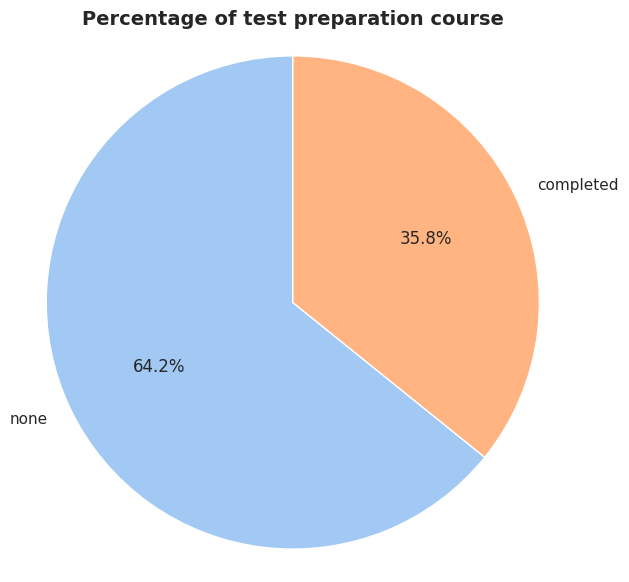

In [37]:
#mengatur gaya grafik seaborn untuk estetika lebih baik
sns.set(style="whitegrid")

#fungsi untuk menampilkan persentase dari kolom kategorikal menggunakan pie chart
def plot_pie_chart(column_name):
    #menghitung persentase setiap kategori
    data = df[column_name].value_counts()
    labels = data.index
    sizes = data.values

    #membuat pie chart
    plt.figure(figsize=(7,7))
    colors = sns.color_palette("pastel", len(labels))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

    plt.axis('equal')
    plt.title(f'Percentage of {column_name}', fontsize=14, fontweight='bold')
    plt.show()

#contoh penggunaan untuk kolom 'gender'
plot_pie_chart('gender')

#anda bisa mengganti 'gender' dengan kolom kategorikal lainnya, misalnya:
plot_pie_chart('race/ethnicity')
plot_pie_chart('parental level of education')
plot_pie_chart('lunch')
plot_pie_chart('test preparation course')


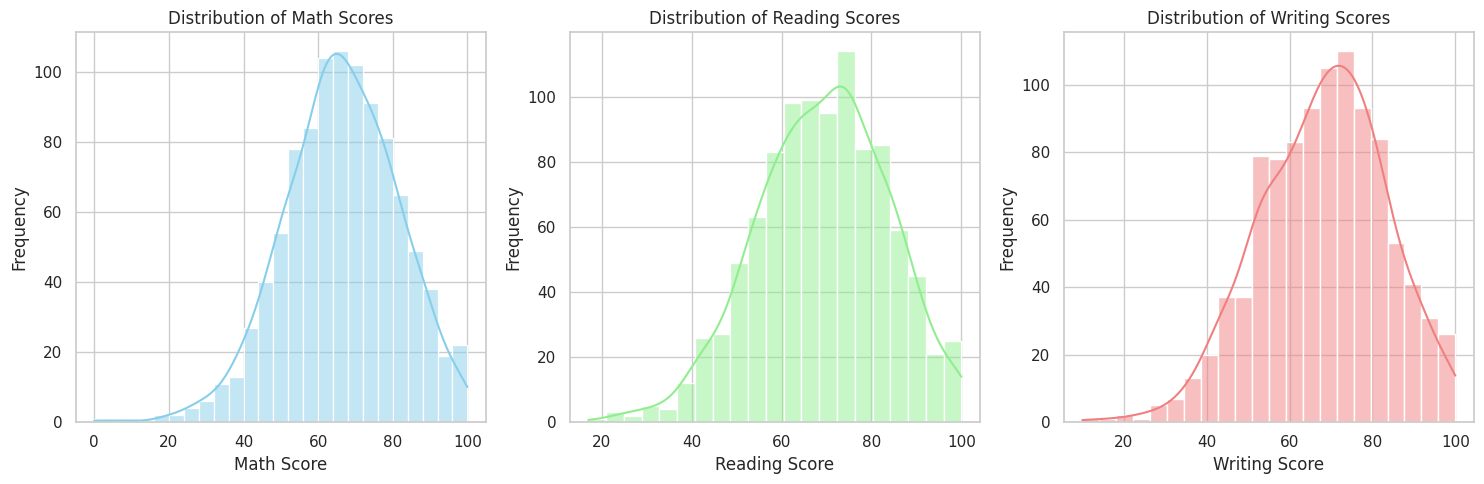

In [38]:
#mengatur gaya untuk grafik
sns.set(style="whitegrid")

#membuat subplot untuk menampilkan distribusi dari setiap skor
plt.figure(figsize=(15,5))

#1. distribusi nilai math
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

#2. distribusi nilai reading
plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='lightgreen')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

#3. distribusi nilai writing
plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='lightcoral')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

#menampilkan grafik
plt.tight_layout()
plt.show()

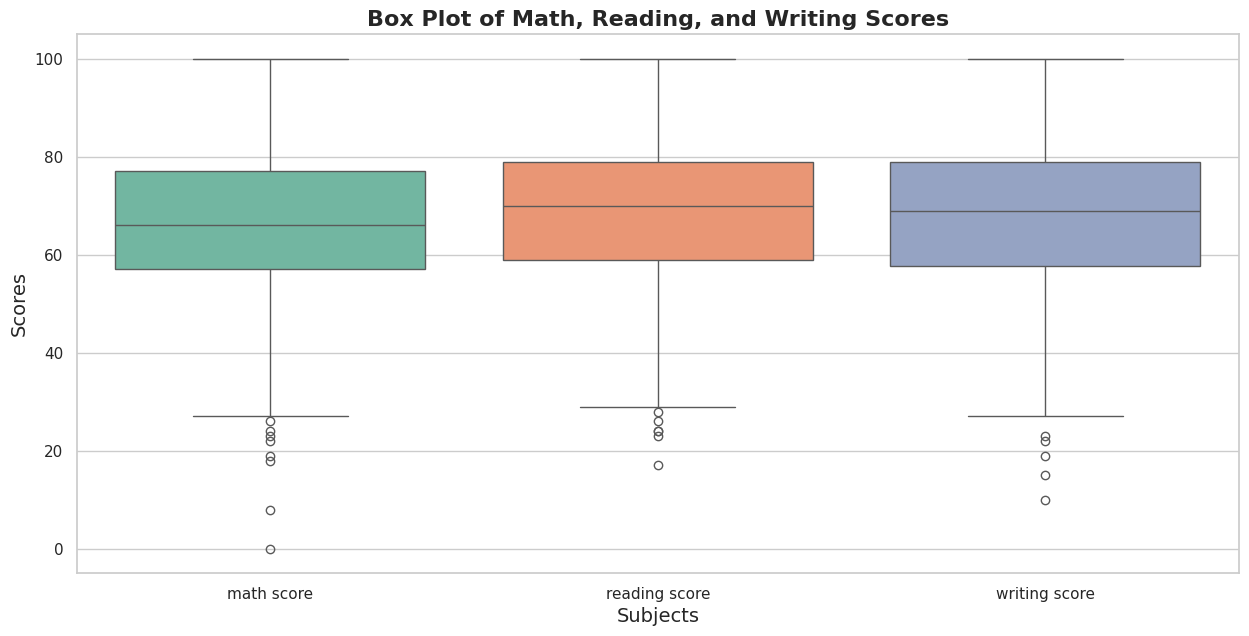

In [40]:
#mengatur gaya untuk grafik seaborn
sns.set(style="whitegrid")

#membuat boxplot untuk math, reading, dan writing score
plt.figure(figsize=(15,7))

#menghubungkan data math, reading, writing score untuk boxplot
sns.boxplot(data=df[['math score', 'reading score', 'writing score']], palette="Set2")

#menambahkan judul dan label
plt.title('Box Plot of Math, Reading, and Writing Scores', fontsize=16, fontweight='bold')
plt.xlabel('Subjects', fontsize=14)
plt.ylabel('Scores', fontsize=14)

#menampilkan grafik
plt.show()

<Figure size 1000x600 with 0 Axes>

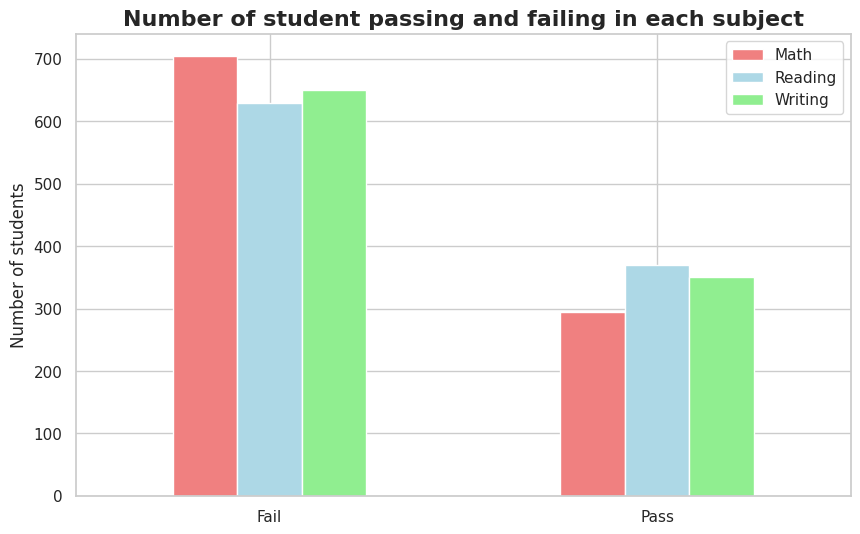

In [41]:
# Definisikan fungsi untuk menentukan lulus atau tidak
def pass_fail(score):
  return 'Pass' if score >= 75 else 'Fail'

# Tambahkan kolom baru untuk pass/fail berdasarkan math, reading, dan writing scores
df['math_result'] = df['math score'].apply(pass_fail)
df['reading_result'] = df['reading score'].apply(pass_fail)
df['writing_result'] = df['writing score'].apply(pass_fail)

#menghitungkan jumlah siswa yang pass dan fail untuk masing-masing pelajaran
math_pass_fail = df['math_result'].value_counts()
reading_pass_fail = df['reading_result'].value_counts()
writing_pass_fail = df['writing_result'].value_counts()

#membuat dataframe baru untuk memudahkan visualisasi
result_df = pd.DataFrame({
    'Math': math_pass_fail,
    'Reading': reading_pass_fail,
    'Writing': writing_pass_fail
})

#Visualisasi hasil menggunakan bar chart
plt.figure(figsize=(10,6))
result_df.plot(kind='bar', figsize=(10,6), color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Number of student passing and failing in each subject', fontsize=16, fontweight='bold')
plt.ylabel('Number of students')
plt.xticks(rotation=0)
plt.show()